# Cleaning and Preprocessing Data for Machine Learning

In [117]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import date, datetime
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle

Kaggle TMDB Competition Test Data 

In [118]:
# Read the csv files into a pandas DataFrame
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."


In [119]:
test.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."


In [120]:
# create count features
#https://www.kaggle.com/jiegeng94/machine-learning-beginner-tutorial
def proc_json_len(string):
    try:
        data = eval(string)
        return len(data)
    except:
        return 0

train['count_genre'] = train.genres.apply(proc_json_len)
train['count_country'] = train.production_countries.apply(proc_json_len)
train['count_company'] = train.production_companies.apply(proc_json_len)
train['count_splang'] = train.spoken_languages.apply(proc_json_len)
train['count_cast'] = train.cast.apply(proc_json_len)
train['count_crew'] = train.crew.apply(proc_json_len)
#train['count_staff'] = train.count_cast + train.count_crew
train['count_keyword'] = train.Keywords.apply(proc_json_len)

In [121]:
#train['budget / popularity'] = train['budget'] / train['popularity']
train['team'] = train['count_cast'] + train['count_crew'] #+ train['count_staff'] 
train['cast popularity'] = train['count_cast'] * train['popularity']
train['title Length'] = train['original_title'].str.len()
train['popularity / title Length'] =  train['popularity'] / train['title Length']
#train['budget / count_staff'] =  train['budget'] / train['count_staff']
train['popularity / count of keywords'] =  train['popularity'] / train['count_keyword']  
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,count_company,count_splang,count_cast,count_crew,count_keyword,team,cast popularity,title Length,popularity / title Length,popularity / count of keywords
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,3,1,24,72,4,96,157.809432,22,0.298881,1.643848
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,1,1,20,9,4,29,164.977900,40,0.206222,2.062224
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,3,1,51,64,12,115,3279.299490,8,8.037499,5.358333
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0,2,7,3,7,10,22.224552,7,0.453562,0.453562
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0,1,4,2,0,6,4.592280,4,0.287018,inf


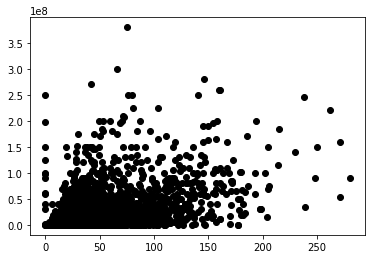

In [122]:
#plt.scatter(train['team'], train['budget'], s=test, alpha=0.5)
 
plt.plot(train['team'], train['budget'],'o', color='black');
#ax.scatter(train['team'], train['budget'], alpha=0.8, c=color, edgecolors='none', s=30)

In [123]:
test['count_genre'] = test.genres.apply(proc_json_len)
test['count_country'] = test.production_countries.apply(proc_json_len)
test['count_company'] = test.production_companies.apply(proc_json_len)
test['count_splang'] = test.spoken_languages.apply(proc_json_len)
test['count_cast'] = test.cast.apply(proc_json_len)
test['count_crew'] = test.crew.apply(proc_json_len)
#test['count_staff'] = test.count_cast + test.count_crew
test['count_keyword'] = test.Keywords.apply(proc_json_len)

#test['budget / popularity'] = test['budget'] / test['popularity']
test['cast popularity'] = test['count_cast'] * test['popularity']
test['title Length'] = test['original_title'].str.len()
test['popularity / title Length'] =  test['popularity'] / test['title Length']
#test['budget / count_staff'] =  test['budget'] / test['count_staff']
#test['popularity / count of keywords'] =  test['popularity'] / test['count_keyword']
    
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,count_genre,count_country,count_company,count_splang,count_cast,count_crew,count_keyword,cast popularity,title Length,popularity / title Length
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,4,2,0,2,7,2,2,26.960738,18,0.213974
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,2,1,1,1,10,8,8,35.597890,27,0.131844
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,2,1,3,1,9,10,4,72.766746,16,0.505325
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,3,2,3,3,23,69,15,197.708276,9,0.955112
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,2,1,0,1,4,14,4,12.870720,18,0.178760


In [124]:
#Collection or not?
train['belongs_to_collection'] = train['belongs_to_collection'].notna()
test['belongs_to_collection'] = test['belongs_to_collection'].notna()

#Create a Year Column
train['date'] = pd.to_datetime(train['release_date'])
train['year'] = train['date'].dt.year

test['date'] = pd.to_datetime(test['release_date'])
test['year'] = test['date'].dt.year

#Create a Month Column
train['month'] = train['date'].dt.month
test['month'] = test['date'].dt.month

#train['budget / popularity'] = train['budget'] / train['popularity']
#test['budget / popularity'] = test['budget'] / test['popularity']


test.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,count_splang,count_cast,count_crew,count_keyword,cast popularity,title Length,popularity / title Length,date,year,month
0,3001,True,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,2,7,2,2,26.960738,18,0.213974,2007-07-14,2007.0,7.0
1,3002,False,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,1,10,8,8,35.597890,27,0.131844,2058-05-19,2058.0,5.0


In [125]:
##GENRES

In [126]:
new_genres_train = pd.DataFrame(train['genres'])
new_genres_test = pd.DataFrame(test['genres'])
new_genres_test.head()

,genres
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '..."
1,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na..."
2,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
3,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n..."
4,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na..."


In [127]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d
#https://www.kaggle.com/rajuspartan/exploratory-data-analysis-with-reusable-functions
#Flatening JSON columns
new_genres_train.genres = new_genres_train.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
new_genres_test.genres = new_genres_test.genres.map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

In [128]:
new_genres_test.head()

,genres
0,"Adventure,Animation,Family,Fantasy"
1,"Horror,Science Fiction"
2,"Comedy,Romance"
3,"Drama,Mystery,War"
4,"Documentary,History"


In [129]:
#Used this approach from Stack Overflow
#https://stackoverflow.com/questions/50394099/separate-columns-based-on-genre
#featurize the genre column
new_genres_train = new_genres_train['genres'].str.get_dummies(',')
new_genres_test = new_genres_test['genres'].str.get_dummies(',')
print(new_genres_test)

      Action  Adventure  Animation  Comedy  Crime  Documentary  Drama  Family  \
0          0          1          1       0      0            0      0       1   
1          0          0          0       0      0            0      0       0   
2          0          0          0       1      0            0      0       0   
3          0          0          0       0      0            0      1       0   
4          0          0          0       0      0            1      0       0   
5          0          0          0       1      0            0      1       0   
6          0          0          0       1      0            0      1       0   
7          0          0          1       0      0            0      0       1   
8          0          0          0       0      0            0      1       0   
9          0          0          1       1      0            0      0       1   
10         0          0          0       1      0            0      0       0   
11         0          0     

In [130]:
#add genres back to data (join)
train = pd.concat([train, new_genres_train], axis = 1, sort = False)
test = pd.concat([test, new_genres_test], axis = 1, sort = False)

test.head()


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,3001,True,0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,0,0,0,0,0,0,0,0,0,0
1,3002,False,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,0,0,1,0,0,0,1,0,0,0
2,3003,False,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,0,0,0,0,0,1,0,0,0,0
3,3004,False,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,0,0,0,0,1,0,0,0,1,0
4,3005,False,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,0,1,0,0,0,0,0,0,0,0


In [131]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'count_genre', 'count_country', 'count_company', 'count_splang',
       'count_cast', 'count_crew', 'count_keyword', 'team', 'cast popularity',
       'title Length', 'popularity / title Length',
       'popularity / count of keywords', 'date', 'year', 'month', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

In [135]:
#Select subset of columns
train = train[['id','belongs_to_collection','budget', 'original_language', 'popularity', 'status','year', 'month','revenue', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western', 'count_genre',
       'count_country', 'count_company', 'count_splang', 'count_cast',
       'count_crew', 'count_keyword', 'cast popularity', 'title Length','popularity / title Length']]
test = test[['id','belongs_to_collection','budget', 'original_language', 'popularity', 'status','year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'Thriller', 'War', 'Western', 'count_genre',
       'count_country', 'count_company', 'count_splang', 'count_cast',
       'count_crew', 'count_keyword', 'cast popularity', 'title Length', 'popularity / title Length']]

test.head()

,id,belongs_to_collection,budget,original_language,popularity,status,year,month,Action,Adventure,...,count_genre,count_country,count_company,count_splang,count_cast,count_crew,count_keyword,cast popularity,title Length,popularity / title Length
0,3001,True,0,ja,3.851534,Released,2007.0,7.0,0,1,...,4,2,0,2,7,2,2,26.960738,18,0.213974
1,3002,False,88000,en,3.559789,Released,2058.0,5.0,0,0,...,2,1,1,1,10,8,8,35.597890,27,0.131844
2,3003,False,0,en,8.085194,Released,1997.0,5.0,0,0,...,2,1,3,1,9,10,4,72.766746,16,0.505325
3,3004,False,6800000,fr,8.596012,Released,2010.0,9.0,0,0,...,3,2,3,3,23,69,15,197.708276,9,0.955112
4,3005,False,2000000,en,3.217680,Released,2005.0,2.0,0,0,...,2,1,0,1,4,14,4,12.870720,18,0.178760


In [136]:
train.head()

,id,belongs_to_collection,budget,original_language,popularity,status,year,month,revenue,Action,...,count_genre,count_country,count_company,count_splang,count_cast,count_crew,count_keyword,cast popularity,title Length,popularity / title Length
0,1,True,14000000,en,6.575393,Released,2015,2,12314651,0,...,1,1,3,1,24,72,4,157.809432,22,0.298881
1,2,True,40000000,en,8.248895,Released,2004,8,95149435,0,...,4,1,1,1,20,9,4,164.977900,40,0.206222
2,3,False,3300000,en,64.299990,Released,2014,10,13092000,0,...,1,1,3,1,51,64,12,3279.299490,8,8.037499
3,4,False,1200000,hi,3.174936,Released,2012,3,16000000,0,...,2,1,0,2,7,3,7,22.224552,7,0.453562
4,5,False,0,ko,1.148070,Released,2009,2,3923970,1,...,2,1,0,1,4,2,0,4.592280,4,0.287018


In [137]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'original_language',
       'popularity', 'status', 'year', 'month', 'revenue', 'Action',
       'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'count_genre', 'count_country', 'count_company', 'count_splang',
       'count_cast', 'count_crew', 'count_keyword', 'cast popularity',
       'title Length', 'popularity / title Length'],
      dtype='object')

In [138]:
test.columns

Index(['id', 'belongs_to_collection', 'budget', 'original_language',
       'popularity', 'status', 'year', 'month', 'Action', 'Adventure',
       'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family',
       'Fantasy', 'Foreign', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'count_genre', 'count_country', 'count_company', 'count_splang',
       'count_cast', 'count_crew', 'count_keyword', 'cast popularity',
       'title Length', 'popularity / title Length'],
      dtype='object')

In [141]:
train = train[['id','belongs_to_collection','budget', 'original_language', 'popularity', 'status', 'year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western', 'count_genre',
       'count_country', 'count_company', 'count_splang', 'count_cast',
       'count_crew', 'count_keyword', 'cast popularity', 'title Length', 'popularity / title Length', 'revenue']]
print(train.shape)

(3000, 38)


In [143]:
test = test[['id','belongs_to_collection','budget', 'original_language', 'popularity', 'status', 'year', 'month', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign',
       'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'Thriller', 'War', 'Western', 'count_genre',
       'count_country', 'count_company', 'count_splang', 'count_cast',
       'count_crew', 'count_keyword', 'cast popularity', 'title Length', 'popularity / title Length', ]]
print(test.shape)

(4398, 37)


Machine Learning algorithms work with numerical data. We have to convert our strings into meaningful numbers. We often use Integer, One-hot, or Binary Encoding. Sklearn provides a preprocessing libarary for all of these standard preprocessing techniques. Pandas also provides a `get_dummies` method that is useful to generate binary encoded data from a Data Frame. 

## Dummy Encoding (Binary Encoded Data)

Dummy Encoding transforms each categorical feature into new columns with a 1 (True) or 0 (False) encoding to represent if that categorical label was present or not in the original row. 

Pandas provides a shortcut to create Binary Encoded data.

In [144]:
data = train.copy()
data2 = test.copy()

In [145]:
data_binary_encoded = pd.get_dummies(data, columns=["belongs_to_collection", "status"])
data2_binary_encoded = pd.get_dummies(data2, columns=["belongs_to_collection", "status"])

data2_binary_encoded.head()

,id,budget,original_language,popularity,year,month,Action,Adventure,Animation,Comedy,...,count_crew,count_keyword,cast popularity,title Length,popularity / title Length,belongs_to_collection_False,belongs_to_collection_True,status_Post Production,status_Released,status_Rumored
0,3001,0,ja,3.851534,2007.0,7.0,0,1,1,0,...,2,2,26.960738,18,0.213974,0,1,0,1,0
1,3002,88000,en,3.559789,2058.0,5.0,0,0,0,0,...,8,8,35.597890,27,0.131844,1,0,0,1,0
2,3003,0,en,8.085194,1997.0,5.0,0,0,0,1,...,10,4,72.766746,16,0.505325,1,0,0,1,0
3,3004,6800000,fr,8.596012,2010.0,9.0,0,0,0,0,...,69,15,197.708276,9,0.955112,1,0,0,1,0
4,3005,2000000,en,3.217680,2005.0,2.0,0,0,0,0,...,14,4,12.870720,18,0.178760,1,0,0,1,0


In [146]:
data_binary_encoded.columns

Index(['id', 'budget', 'original_language', 'popularity', 'year', 'month',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'count_genre', 'count_country', 'count_company', 'count_splang',
       'count_cast', 'count_crew', 'count_keyword', 'cast popularity',
       'title Length', 'popularity / title Length', 'revenue',
       'belongs_to_collection_False', 'belongs_to_collection_True',
       'status_Released', 'status_Rumored'],
      dtype='object')

In [147]:
#Select subset of columns
train = data_binary_encoded[['id', 'budget', 'original_language', 'popularity', 'year', 'month',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'count_genre', 'count_country', 'count_company', 'count_splang',
       'count_cast', 'count_crew','count_keyword',
       'cast popularity', 'title Length',
       'popularity / title Length', 
       'belongs_to_collection_False', 'belongs_to_collection_True',
       'status_Released', 'status_Rumored','revenue']]
train.head()

,id,budget,original_language,popularity,year,month,Action,Adventure,Animation,Comedy,...,count_crew,count_keyword,cast popularity,title Length,popularity / title Length,belongs_to_collection_False,belongs_to_collection_True,status_Released,status_Rumored,revenue
0,1,14000000,en,6.575393,2015,2,0,0,0,1,...,72,4,157.809432,22,0.298881,0,1,1,0,12314651
1,2,40000000,en,8.248895,2004,8,0,0,0,1,...,9,4,164.977900,40,0.206222,0,1,1,0,95149435
2,3,3300000,en,64.299990,2014,10,0,0,0,0,...,64,12,3279.299490,8,8.037499,1,0,1,0,13092000
3,4,1200000,hi,3.174936,2012,3,0,0,0,0,...,3,7,22.224552,7,0.453562,1,0,1,0,16000000
4,5,0,ko,1.148070,2009,2,1,0,0,0,...,2,0,4.592280,4,0.287018,1,0,1,0,3923970


In [148]:
data2_binary_encoded.columns

Index(['id', 'budget', 'original_language', 'popularity', 'year', 'month',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'count_genre', 'count_country', 'count_company', 'count_splang',
       'count_cast', 'count_crew', 'count_keyword', 'cast popularity',
       'title Length', 'popularity / title Length',
       'belongs_to_collection_False', 'belongs_to_collection_True',
       'status_Post Production', 'status_Released', 'status_Rumored'],
      dtype='object')

In [149]:
test = data2_binary_encoded[['id', 'budget', 'original_language', 'popularity', 'year', 'month',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'count_genre', 'count_country', 'count_company', 'count_splang',
       'count_cast', 'count_crew', 'count_keyword',
       'cast popularity', 'title Length',
       'popularity / title Length', 'belongs_to_collection_False', 'belongs_to_collection_True', 'status_Released', 'status_Rumored']]
test.head()

,id,budget,original_language,popularity,year,month,Action,Adventure,Animation,Comedy,...,count_cast,count_crew,count_keyword,cast popularity,title Length,popularity / title Length,belongs_to_collection_False,belongs_to_collection_True,status_Released,status_Rumored
0,3001,0,ja,3.851534,2007.0,7.0,0,1,1,0,...,7,2,2,26.960738,18,0.213974,0,1,1,0
1,3002,88000,en,3.559789,2058.0,5.0,0,0,0,0,...,10,8,8,35.597890,27,0.131844,1,0,1,0
2,3003,0,en,8.085194,1997.0,5.0,0,0,0,1,...,9,10,4,72.766746,16,0.505325,1,0,1,0
3,3004,6800000,fr,8.596012,2010.0,9.0,0,0,0,0,...,23,69,15,197.708276,9,0.955112,1,0,1,0
4,3005,2000000,en,3.217680,2005.0,2.0,0,0,0,0,...,4,14,4,12.870720,18,0.178760,1,0,1,0


## Factorize to map each categorical item in a column to a value

In [150]:
train['language_enc'] = pd.factorize(train['original_language'])[0]
train.head()

,id,budget,original_language,popularity,year,month,Action,Adventure,Animation,Comedy,...,count_keyword,cast popularity,title Length,popularity / title Length,belongs_to_collection_False,belongs_to_collection_True,status_Released,status_Rumored,revenue,language_enc
0,1,14000000,en,6.575393,2015,2,0,0,0,1,...,4,157.809432,22,0.298881,0,1,1,0,12314651,0
1,2,40000000,en,8.248895,2004,8,0,0,0,1,...,4,164.977900,40,0.206222,0,1,1,0,95149435,0
2,3,3300000,en,64.299990,2014,10,0,0,0,0,...,12,3279.299490,8,8.037499,1,0,1,0,13092000,0
3,4,1200000,hi,3.174936,2012,3,0,0,0,0,...,7,22.224552,7,0.453562,1,0,1,0,16000000,1
4,5,0,ko,1.148070,2009,2,1,0,0,0,...,0,4.592280,4,0.287018,1,0,1,0,3923970,2


In [151]:
test['language_enc'] = pd.factorize(test['original_language'])[0]
test.head()

,id,budget,original_language,popularity,year,month,Action,Adventure,Animation,Comedy,...,count_crew,count_keyword,cast popularity,title Length,popularity / title Length,belongs_to_collection_False,belongs_to_collection_True,status_Released,status_Rumored,language_enc
0,3001,0,ja,3.851534,2007.0,7.0,0,1,1,0,...,2,2,26.960738,18,0.213974,0,1,1,0,0
1,3002,88000,en,3.559789,2058.0,5.0,0,0,0,0,...,8,8,35.597890,27,0.131844,1,0,1,0,1
2,3003,0,en,8.085194,1997.0,5.0,0,0,0,1,...,10,4,72.766746,16,0.505325,1,0,1,0,1
3,3004,6800000,fr,8.596012,2010.0,9.0,0,0,0,0,...,69,15,197.708276,9,0.955112,1,0,1,0,2
4,3005,2000000,en,3.217680,2005.0,2.0,0,0,0,0,...,14,4,12.870720,18,0.178760,1,0,1,0,1


In [152]:
#This is just a list of all of the languages listed
catenc = pd.factorize(train['original_language'])
catenc


(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 Index(['en', 'hi', 'ko', 'sr', 'fr', 'it', 'nl', 'zh', 'es', 'cs', 'ta', 'cn',
        'ru', 'tr', 'ja', 'fa', 'sv', 'de', 'te', 'pt', 'mr', 'da', 'fi', 'el',
        'ur', 'he', 'no', 'ar', 'nb', 'ro', 'vi', 'pl', 'hu', 'ml', 'bn', 'id'],
       dtype='object'))


# FINAL CLEANUP FOR NaN

In [153]:
#Check to make sure data is clean for projection
#are any values NaN or Infinite?
#np.any(np.isnan(test))
#np.all(np.isfinite(test))

In [154]:
train.dtypes
#print(train.shape)

id                               int64
budget                           int64
original_language               object
popularity                     float64
year                             int64
month                            int64
Action                           int64
Adventure                        int64
Animation                        int64
Comedy                           int64
Crime                            int64
Documentary                      int64
Drama                            int64
Family                           int64
Fantasy                          int64
Foreign                          int64
History                          int64
Horror                           int64
Music                            int64
Mystery                          int64
Romance                          int64
Science Fiction                  int64
Thriller                         int64
War                              int64
Western                          int64
count_genre              

In [155]:
test.dtypes
#print(test.shape)

id                               int64
budget                           int64
original_language               object
popularity                     float64
year                           float64
month                          float64
Action                           int64
Adventure                        int64
Animation                        int64
Comedy                           int64
Crime                            int64
Documentary                      int64
Drama                            int64
Family                           int64
Fantasy                          int64
Foreign                          int64
History                          int64
Horror                           int64
Music                            int64
Mystery                          int64
Romance                          int64
Science Fiction                  int64
Thriller                         int64
War                              int64
Western                          int64
count_genre              

In [156]:
#Select subset of columns
train = train[['id', 'budget', 'popularity', 'year', 'month',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'count_genre', 'count_country', 'count_company', 'count_splang',
       'count_cast', 'count_crew', 'count_keyword','cast popularity', 'title Length',
       'popularity / title Length', 
       'belongs_to_collection_True', 'status_Released', 'status_Rumored','revenue']]
train.head()

,id,budget,popularity,year,month,Action,Adventure,Animation,Comedy,Crime,...,count_cast,count_crew,count_keyword,cast popularity,title Length,popularity / title Length,belongs_to_collection_True,status_Released,status_Rumored,revenue
0,1,14000000,6.575393,2015,2,0,0,0,1,0,...,24,72,4,157.809432,22,0.298881,1,1,0,12314651
1,2,40000000,8.248895,2004,8,0,0,0,1,0,...,20,9,4,164.977900,40,0.206222,1,1,0,95149435
2,3,3300000,64.299990,2014,10,0,0,0,0,0,...,51,64,12,3279.299490,8,8.037499,0,1,0,13092000
3,4,1200000,3.174936,2012,3,0,0,0,0,0,...,7,3,7,22.224552,7,0.453562,0,1,0,16000000
4,5,0,1.148070,2009,2,1,0,0,0,0,...,4,2,0,4.592280,4,0.287018,0,1,0,3923970


In [157]:
test = test[['id', 'budget', 'popularity', 'year', 'month',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'count_genre', 'count_country', 'count_company', 'count_splang',
       'count_cast', 'count_crew', 'count_keyword',
    'cast popularity', 'title Length',
       'popularity / title Length', 
       'belongs_to_collection_True', 'status_Released', 'status_Rumored']]

In [158]:
#Are there any Nan in train?
np.any(np.isnan(train))

False

In [159]:
#Are there any Nan in test?
np.any(np.isnan(test))

True

In [160]:
#Are there any infinite in X?
np.all(np.isinf(train))

False

In [161]:
#Are there any infinite in test?
np.all(np.isinf(test))

False

In [162]:
np.nan_to_num(train)

array([[1.00000000e+00, 1.40000000e+07, 6.57539300e+00, ...,
        1.00000000e+00, 0.00000000e+00, 1.23146510e+07],
       [2.00000000e+00, 4.00000000e+07, 8.24889500e+00, ...,
        1.00000000e+00, 0.00000000e+00, 9.51494350e+07],
       [3.00000000e+00, 3.30000000e+06, 6.42999900e+01, ...,
        1.00000000e+00, 0.00000000e+00, 1.30920000e+07],
       ...,
       [2.99800000e+03, 6.50000000e+07, 1.44823450e+01, ...,
        1.00000000e+00, 0.00000000e+00, 8.94567610e+07],
       [2.99900000e+03, 4.20000000e+07, 1.57255420e+01, ...,
        1.00000000e+00, 0.00000000e+00, 1.71963386e+08],
       [3.00000000e+03, 3.50000000e+07, 1.05121090e+01, ...,
        1.00000000e+00, 0.00000000e+00, 8.20871550e+07]])

In [163]:
np.nan_to_num(test)


array([[3.0010000e+03, 0.0000000e+00, 3.8515340e+00, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [3.0020000e+03, 8.8000000e+04, 3.5597890e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [3.0030000e+03, 0.0000000e+00, 8.0851940e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [7.3960000e+03, 1.6000000e+07, 9.5968830e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [7.3970000e+03, 2.0000000e+06, 2.0359336e+01, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [7.3980000e+03, 6.4000000e+04, 1.1305910e+01, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [164]:
# df1_NaN = train[train.isnull().any(axis=1)]
# print(df1_NaN)

In [165]:
# df2_NaN = test[test.isnull().any(axis=1)]
# print(df2_NaN)

In [166]:
# test.fillna(0,inplace = True)
# df2_NaN = test[test.isnull().any(axis=1)]

# print(df2_NaN)


In [167]:
# train.fillna(0,inplace = True)
# df1_NaN = train[train.isnull().any(axis=1)]

# print(df1_NaN)

In [168]:
#Fill missing data even though it doesn't say we have any...
train = train.fillna(lambda x: x.median())

In [169]:
test = test.fillna(lambda x: x.median())

## Can we predict the film revenue from this dataset?

In [170]:
X = train[['id', 'budget', 'popularity', 'year', 'month',
       'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western',
       'count_genre', 'count_country', 'count_company', 'count_splang',
       'count_cast', 'count_crew',  'count_keyword',
    'cast popularity', 'title Length',
       'popularity / title Length', 
       'belongs_to_collection_True', 'status_Released', 'status_Rumored']]
y = train['revenue'].values.reshape(-1,1)
print(X.shape, y.shape)

(3000, 37) (3000, 1)


# TEST / TRAIN SPLIT OF ORIGINAL TRAIN Dataset

In [171]:
# Use train_test_split to create training and testing data from our "train" dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [172]:
print(X_train.shape, y_train.shape)

(2250, 37) (2250, 1)


In [173]:
print(X_test.shape, y_test.shape)

(750, 37) (750, 1)


In [174]:
#np.all(np.isinf(y))
#np.all(np.isnan(y))

# LINEAR REGRESSION - No Scaling

In [175]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
predictions = model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)

In [176]:
print(f"Training Score: {training_score}")

Training Score: 0.6728046340348849


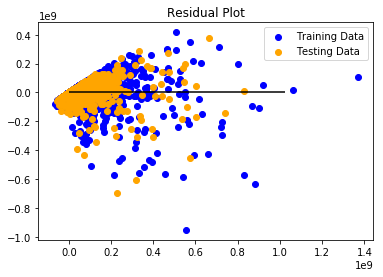

MSE: 6460510627065662.0, R2: 0.6153663678711438


In [177]:
# Plot the Residuals for the Training and Testing data
### BEGIN SOLUTION
predictions = model.predict(X_test)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(predictions, predictions - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION
print(f"MSE: {MSE}, R2: {r2}")


In [178]:
model.predict(X_train).shape

(2250, 1)

In [179]:
y_train.shape

(2250, 1)

In [180]:
#Check to make sure data is clean for projection
#are any values NaN or Infinite?
#np.any(np.isnan(test))

In [181]:
#np.all(np.isfinite(test))

In [182]:
#Make Predictions
#predictions = pd.DataFrame(model.predict(test), columns = ['revenue'])
#output = pd.concat([test['id'], predictions], axis=1)


In [183]:
#Save to csv
#output.dtypes



In [184]:
#output.head()

In [185]:
#output.to_csv("outputs/output_" + str(date.today()) + "_2" + ".csv", index=False)

class sklearn.ensemble.GradientBoostingRegressor(loss=’ls’, learning_rate=0.1, n_estimators=100, subsample=1.0, criterion=’friedman_mse’, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, presort=’auto’, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)[source]¶

In [186]:
# Note:  Changing max depth from 4 to 6 increased the score from .87 to .94 BUT decreased our kaggle overall score.
#Note: Increasing the learning rate from .01 to .1 increased score to .97 BUT decreased our kaggle overall score.
# How to we call out the MSE?
import numpy as np
import matplotlib.pyplot as plt
# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train,y_train)
training_score = clf.score(X_train, y_train)
print(f"Training Score: {training_score}")

Training Score: 0.8957149869895109


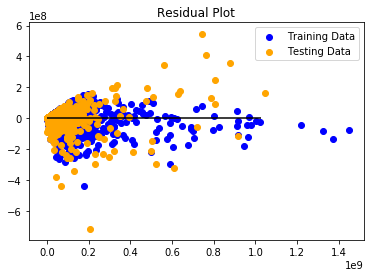

MSE: 5700973605633255.0, R2: 0.6605862429172391


In [187]:
# Plot the Residuals for the Training and Testing data
### BEGIN SOLUTION

predictions2 = np.expand_dims(clf.predict(X_test), axis = 1)
plt.scatter((np.expand_dims(clf.predict(X_train), axis = 1)), (np.expand_dims(clf.predict(X_train), axis = 1)) - y_train, c="blue", label="Training Data")
plt.scatter(predictions2, predictions2 - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

MSE = mean_squared_error(y_test, predictions2)
r2 = clf.score(X_test, y_test)
print(f"MSE: {MSE}, R2: {r2}")

## Scaling and Normalization

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. You may not see a difference with the Sklearn LinearRegression model, but other models that use gradient descent need normalization to help the algorithms converge to a local optima.

Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data.

### StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

In [188]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [189]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

StandardScaler applies a Guassian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

In [190]:
# Create a LinearRegression model and fit it to the scaled training data
model2 = LinearRegression()
model2.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

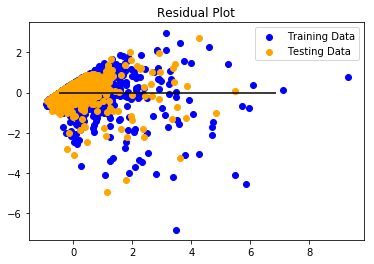

In [191]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model2.predict(X_test_scaled)
plt.scatter(model2.predict(X_train_scaled), model2.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(predictions, predictions - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [192]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model2.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3294887377811815, R2: 0.6153663678691585


# Ridge Model

In [193]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3294867963297882, R2: 0.6153686342516335


# ElasticNet model

In [194]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3252645780788476, R2: 0.6202975042107244


# GradientBoostingRegressor

In [195]:
# Note:  Changing max depth from 4 to 6 increased the score from .87 to .94 BUT decreased our kaggle overall score.
#Note: Increasing the learning rate from .01 to .1 increased score to .97 BUT decreased our kaggle overall score.
import numpy as np
import matplotlib.pyplot as plt
# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'} 
clf = ensemble.GradientBoostingRegressor(**params)
predictions2 = clf.fit(X_train_scaled,y_train_scaled)
training_score = clf.score(X_train_scaled, y_train_scaled)
print(f"Training Score: {training_score}")

Training Score: 0.8957149869017574


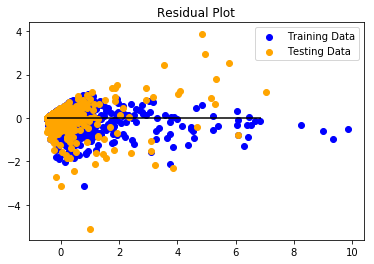

MSE: 0.29162302120637196, R2: 0.659569481448957


In [196]:
# Plot the Residuals for the Training and Testing data
### BEGIN SOLUTION

predictions2 = np.expand_dims(clf.predict(X_test_scaled), axis = 1)
plt.scatter((np.expand_dims(clf.predict(X_train_scaled), axis = 1)), (np.expand_dims(clf.predict(X_train_scaled), axis = 1)) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(predictions2, predictions2 - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

MSE = mean_squared_error(y_test_scaled, predictions2)
r2 = clf.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

# Random Forest Regressor

class sklearn.ensemble.RandomForestRegressor(n_estimators=’warn’, criterion=’mse’, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)[source]

In [197]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf = rf.fit(X_train_scaled, y_train_scaled)
rf.score(X_train_scaled, y_train_scaled)

0.9427387258315855

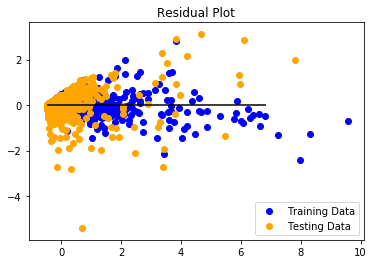

MSE: 0.31522262424376807, R2: 0.632020130007549


In [198]:
# Plot the Residuals for the Training and Testing data
### BEGIN SOLUTION

predictions3 = np.expand_dims(rf.predict(X_test_scaled), axis = 1)
plt.scatter((np.expand_dims(rf.predict(X_train_scaled), axis = 1)), (np.expand_dims(rf.predict(X_train_scaled), axis = 1)) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(predictions3, predictions3 - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

MSE = mean_squared_error(y_test_scaled, predictions3)
r2 = rf.score(X_test_scaled, y_test_scaled)
print(f"MSE: {MSE}, R2: {r2}")

In [199]:
feature_names = train.columns

In [200]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.5774301463752703, 'budget'),
 (0.09487514623713998, 'popularity'),
 (0.040744828730370206, 'count_cast'),
 (0.03810000608144331, 'cast popularity'),
 (0.027625493743450236, 'popularity / title Length'),
 (0.025733826300203967, 'belongs_to_collection_True'),
 (0.024118930672909263, 'title Length'),
 (0.02320424035891846, 'count_crew'),
 (0.020493036682954102, 'id'),
 (0.018984651421971525, 'count_keyword'),
 (0.01841906956664789, 'year'),
 (0.015550221860483235, 'month'),
 (0.010440787796694512, 'count_company'),
 (0.01024913436362925, 'count_genre'),
 (0.005877671913241149, 'count_splang'),
 (0.005637839737906754, 'Thriller'),
 (0.005099030355857901, 'count_country'),
 (0.0048818640406486724, 'Crime'),
 (0.004573435709557427, 'Animation'),
 (0.003911750018536158, 'Romance'),
 (0.003471799836108401, 'Drama'),
 (0.0034342689875504423, 'Science Fiction'),
 (0.0032654379477319987, 'Adventure'),
 (0.0028054363159074752, 'Family'),
 (0.002252688173642598, 'Action'),
 (0.00223992897725783

# OUPUT

In [ ]:
#Be sure to run the training model on the full X (train) before running the predictions for test

#Make New Predictions
gbr_predictions = pd.DataFrame(clf.predict(test), columns = ['revenue'])
output = pd.concat([test['id'], gbr_predictions], axis=1)

In [ ]:
output.head()

In [ ]:
output.to_csv("outputs/output_" + str(date.today()) + "_4" + ".csv", index=False)